In [1]:
from python_gdal import *
from models_keras import *
import time
from keras import backend as K

Using TensorFlow backend.


In [2]:
MAIN_FOLDER = r'E:/HSI/'
IP_DATA_PATH = 'IP/Indian_pines_corrected'
IP_TRAIN_PATH = 'IP/Indian_pines_gt'
PAVIA_DATA_PATH = "Pavia/Pavia"
PAVIA_TRAIN_PATH = "Pavia/Pavia_gt"
PAVIA_U_DATA_PATH = "Pavia/PaviaU"
PAVIA_U_TRAIN_PATH = "Pavia/PaviaU_gt"
SALINAS_DATA_PATH = "Salinas/Salinas"
SALINAS_TRAIN_PATH = 'Salinas/Salinas_gt'
KSC_DATA_PATH = "KSC/KSC"
KSC_TRAIN_PATH = "KSC/KSC_gt"
IEEEHSI_2018_DATA_PATH = "2018IEEEHSI/FullHSIDataset/20170218_UH_CASI_S4_NAD83.pix"
IEEEHSI_2018_TRAIN_PATH = "2018IEEEHSI/GT"

In [3]:
c = [16, 9, 9, 13]
input_shape1 = [(200,), (102,), (103,), (176,)]
input_shape2 = [(200, 1), (102, 1), (103, 1), (176, 1)]
lists2 = [200, 200, 200, 200, 200, 200, 200, 200, 200]
lists1 = [33, 200, 200, 181, 200, 200, 20, 200, 14, 200, 200, 200, 143, 200, 200, 75]
lists3 = [200, 150, 150, 150, 100, 150, 50, 200, 200, 200, 200, 200, 200]
lists = [lists1, lists2, lists2, lists3]
image_shape = [(145, 145), (1096, 715), (610, 340), (512, 614)]
DATA_PATH = [IP_DATA_PATH, PAVIA_DATA_PATH, PAVIA_U_DATA_PATH, KSC_DATA_PATH]
TRAIN_PATH = [IP_TRAIN_PATH, PAVIA_TRAIN_PATH, PAVIA_U_TRAIN_PATH, KSC_TRAIN_PATH]

In [4]:
i = 0
m = 19

# data prep

In [39]:
train_samples_1, train_labels_1 = get_train_sample(data_path=MAIN_FOLDER+DATA_PATH[i],
                                               train_data_path=MAIN_FOLDER+TRAIN_PATH[i],
                                               c=c[i], m=m, lists=lists[i], d=4)

In [41]:
print(train_samples_1.shape)

(2466, 19, 19, 200)


In [40]:
train_samples_2, train_labels_2 = get_train_sample(data_path=MAIN_FOLDER+DATA_PATH[i],
                                               train_data_path=MAIN_FOLDER+TRAIN_PATH[i],
                                               c=c[i], m=1, lists=lists[i], d=3)

In [42]:
train_labels = one_hot_encode(c=c[i], labels=train_labels_1)

In [43]:
print(train_samples_2.shape)

(2466, 200, 1)


In [44]:
print(train_labels_1[:10])
print(train_labels_2[:10])

[12.  4.  4. 10. 14. 14. 14.  8.  8.  8.]
[12.  4.  4. 10. 14. 14. 14.  8.  8.  8.]


# model prep

In [11]:
cnn_1d_model = load_model("cnn_1d_IP.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [12]:
cnn_2d_model = load_model("model/19-cnn_2d_IP.h5")

In [13]:
cnn_1d_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 12)           72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 12)           48        
_________________________________________________________________
activation_1 (Activation)    (None, 200, 12)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 12)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 24)           1464      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 24)           96        
__________

In [14]:
cnn_2d_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 19, 19, 200)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 19, 19, 12)        21612     
_________________________________________________________________
batch_normalization_67 (Batc (None, 19, 19, 12)        48        
_________________________________________________________________
activation_67 (Activation)   (None, 19, 19, 12)        0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 10, 10, 12)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 10, 10, 24)        2616      
_________________________________________________________________
batch_normalization_68 (Batc (None, 10, 10, 24)        96        
__________

In [27]:
x_1 = cnn_1d_model.layers[-4].output

In [28]:
print(x_1)

Tensor("flatten_1/Reshape:0", shape=(?, ?), dtype=float32)


In [29]:
x_2 = cnn_2d_model.layers[-4].output

In [30]:
print(x_2)

Tensor("flatten_23/Reshape:0", shape=(?, ?), dtype=float32)


In [31]:
x_3 = concatenate([x_1, x_2], axis=1)

In [32]:
print(x_3)

Tensor("concatenate_1/concat:0", shape=(?, ?), dtype=float32)


In [33]:
x = Dense(256, activation='relu')(x_3)
y = Dense(16, activation='relu')(x)

In [34]:
input_1 = Input(shape=(200, 1))
input_2 = Input(shape=(19, 19, 200))

In [35]:
model = Model(inputs=[input_1, input_2], outputs=y)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_1:0", shape=(?, 200, 1), dtype=float32) at layer "input_1". The following previous layers were accessed without issue: []

In [ ]:
load_model()

In [49]:
train_samples_1.shape

(2466, 19, 19, 200)

# features prep

In [45]:
cnn_1d_feature = K.function([cnn_1d_model.layers[0].input, K.learning_phase()],
                            [cnn_1d_model.layers[-4].output])

In [46]:
cnn_2d_feature = K.function([cnn_2d_model.layers[0].input, K.learning_phase()],
                            [cnn_2d_model.layers[-4].output])

In [51]:
features_1d = cnn_1d_feature([train_samples_2])[0]

In [144]:
place = Input(shape=(200, 1))

In [145]:
print(place)

Tensor("input_11:0", shape=(?, 200, 1), dtype=float32)


In [154]:
ff = cnn_1d_feature([place])[0]

InvalidArgumentError: You must feed a value for placeholder tensor 'input_11' with dtype float and shape [?,200,1]
	 [[{{node input_11}}]]

In [156]:
fla_cnn_1d_model = Model(inputs=cnn_1d_model.input,
                         outputs=cnn_1d_model.layers[-4].output)

In [157]:
print(fla_cnn_1d_model)

In [159]:
fla_cnn_1d_model(place)

<tf.Tensor 'model_9/flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [166]:
fla_cnn_1d_model([place])

<tf.Tensor 'model_9/flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [169]:
fla_cnn_2d_model = Model(inputs=cnn_2d_model.input,
                         outputs=cnn_2d_model.layers[-4].output)

In [171]:
places = Input(shape=(19, 19, 200))

In [172]:
fla_cnn_2d_model([places])

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000002624D771240>>
Traceback (most recent call last):
  File "c:\python\python36\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "c:\python\python36\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 2621179347136


<tf.Tensor 'model_11/flatten_23/Reshape:0' shape=(?, ?) dtype=float32>

In [174]:
x = concatenate([fla_cnn_1d_model.output, fla_cnn_2d_model.output], axis=1)

AttributeError: Layer model_9 has multiple inbound nodes, hence the notion of "layer output" is ill-defined. Use `get_output_at(node_index)` instead.

In [52]:
features_2d = cnn_2d_feature([train_samples_1])[0]

In [53]:
print(features_1d.shape)
print(features_2d.shape)

(2466, 864)
(2466, 432)


# features concatenate

In [54]:
fusion_layer = np.concatenate([features_1d, features_2d], axis=1)

In [55]:
print(fusion_layer.shape)

(2466, 1296)


In [177]:
inputs = Input(shape=(fusion_layer.shape[-1],))
y = Dense(256, activation='relu')(inputs)
output = Dense(c[0], activation='softmax')(y)

In [129]:
model1 = Model(inputs=inputs, outputs=output)

In [130]:
model1.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [131]:
network = model1.fit(fusion_layer, train_labels, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
2466/2466 [==============================] - 1s 357us/step - loss: 1.7909 - acc: 0.5470
Epoch 2/100
2466/2466 [==============================] - 0s 125us/step - loss: 0.7469 - acc: 0.8629
Epoch 3/100
2466/2466 [==============================] - 0s 131us/step - loss: 0.4133 - acc: 0.9404
Epoch 4/100
2466/2466 [==============================] - 0s 125us/step - loss: 0.2626 - acc: 0.9704
Epoch 5/100
2466/2466 [==============================] - 0s 124us/step - loss: 0.1763 - acc: 0.9874
Epoch 6/100
2466/2466 [==============================] - 0s 131us/step - loss: 0.1285 - acc: 0.9931
Epoch 7/100
2466/2466 [==============================] - 0s 128us/step - loss: 0.0977 - acc: 0.9947
Epoch 8/100
2466/2466 [==============================] - 0s 126us/step - loss: 0.0773 - acc: 0.9972
Epoch 9/100
2466/2466 [==============================] - 0s 133us/step - loss: 0.0621 - acc: 0.9984
Epoch 10/100
2466/2466 [==============================] - 0s 137us/step - loss: 0.0514 - acc: 0.9992

2466/2466 [==============================] - 0s 150us/step - loss: 6.5137e-04 - acc: 1.0000
Epoch 82/100
2466/2466 [==============================] - 0s 142us/step - loss: 6.3002e-04 - acc: 1.0000
Epoch 83/100
2466/2466 [==============================] - 0s 144us/step - loss: 6.0851e-04 - acc: 1.0000
Epoch 84/100
2466/2466 [==============================] - 0s 133us/step - loss: 5.8589e-04 - acc: 1.0000
Epoch 85/100
2466/2466 [==============================] - 0s 139us/step - loss: 5.7441e-04 - acc: 1.0000
Epoch 86/100
2466/2466 [==============================] - 0s 121us/step - loss: 5.4830e-04 - acc: 1.0000
Epoch 87/100
2466/2466 [==============================] - 0s 136us/step - loss: 5.2826e-04 - acc: 1.0000
Epoch 88/100
2466/2466 [==============================] - 0s 128us/step - loss: 5.1178e-04 - acc: 1.0000
Epoch 89/100
2466/2466 [==============================] - 0s 140us/step - loss: 4.9805e-04 - acc: 1.0000
Epoch 90/100
2466/2466 [==============================] - 0s 124us/s

Overall Accuracy:100.0000%
Kappa:  1.0
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        33
           2     1.0000    1.0000    1.0000       200
           3     1.0000    1.0000    1.0000       200
           4     1.0000    1.0000    1.0000       181
           5     1.0000    1.0000    1.0000       200
           6     1.0000    1.0000    1.0000       200
           7     1.0000    1.0000    1.0000        20
           8     1.0000    1.0000    1.0000       200
           9     1.0000    1.0000    1.0000        14
          10     1.0000    1.0000    1.0000       200
          11     1.0000    1.0000    1.0000       200
          12     1.0000    1.0000    1.0000       200
          13     1.0000    1.0000    1.0000       143
          14     1.0000    1.0000    1.0000       200
          15     1.0000    1.0000    1.0000       200
          16     1.0000    1.0000    1.0000        75

   micro avg     1.0000    1.0000    1.00

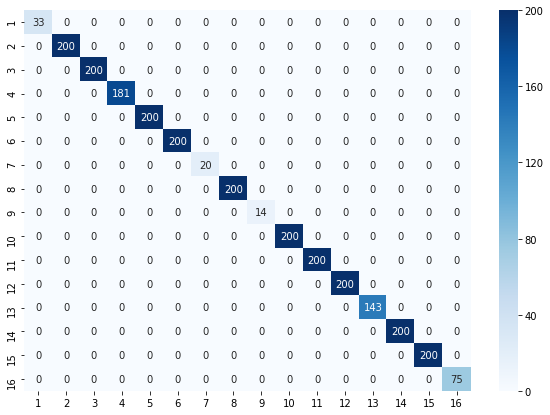

In [60]:
predic = model.predict(fusion_layer)
print_plot_cm(train_labels, predic)

In [61]:
bands_data, is_train, training_labels = get_prep_data(data_path=MAIN_FOLDER+DATA_PATH[i], 
                                                      train_data_path=MAIN_FOLDER+TRAIN_PATH[i])

In [62]:
_, x_test_index, _, y_test = custom_train_index(is_train, training_labels, c=c[i], 
                                                lists=lists[i])

In [63]:
samples = []
for j in x_test_index:
    sample = bands_data[j[0], j[1]]
    samples.append(sample)
samples = np.stack(samples)
samples = samples.reshape((samples.shape[0], samples.shape[1], -1))

In [64]:
print(samples.shape)

(7783, 200, 1)


In [65]:
featurs_1 = cnn_1d_feature([samples])[0]

In [66]:
print(featurs_1.shape)

(7783, 864)


In [67]:
samples_1 = []
features = []
n = int((m - 1) / 2)
x_test_nindex = x_test_index + n
bands_data = np.pad(bands_data, ((n, n), (n, n), (0, 0)), 'constant', constant_values=0)
for i, j in enumerate(x_test_nindex):
    k1 = j[0] - n
    k2 = j[0] + n + 1
    k3 = j[1] - n
    k4 = j[1] + n + 1
    block = bands_data[k1:k2, k3:k4]
    samples_1.append(block)
    if len(samples_1) == 3200 or i == x_test_nindex.shape[0] - 1:
        print("Batches Features...")
        pre = np.stack(samples_1)
        feature = cnn_2d_feature([pre])[0]
        features.append(feature)
        samples_1 = []
features = np.concatenate(features)

Batches Features...
Batches Features...
Batches Features...


In [68]:
print(features.shape)

(7783, 432)


In [69]:
fea = np.concatenate([featurs_1, features], axis=1)
print(fea.shape)

(7783, 1296)


In [133]:
pred = model1.predict(fea)

Overall Accuracy:99.0107%
Kappa:  0.9883143433849298
              precision    recall  f1-score   support

         1.0     1.0000    1.0000    1.0000        13
         2.0     0.9918    0.9821    0.9869      1228
         3.0     0.9752    0.9968    0.9859       630
         4.0     0.9655    1.0000    0.9825        56
         5.0     0.9859    0.9894    0.9877       283
         6.0     0.9925    0.9981    0.9953       530
         7.0     1.0000    1.0000    1.0000         8
         8.0     1.0000    1.0000    1.0000       278
         9.0     1.0000    1.0000    1.0000         6
        10.0     0.9821    0.9935    0.9878       772
        11.0     0.9973    0.9831    0.9902      2255
        12.0     0.9703    0.9975    0.9837       393
        13.0     1.0000    1.0000    1.0000        62
        14.0     0.9962    0.9962    0.9962      1065
        15.0     0.9788    0.9946    0.9867       186
        16.0     0.9474    1.0000    0.9730        18

   micro avg     0.9901    

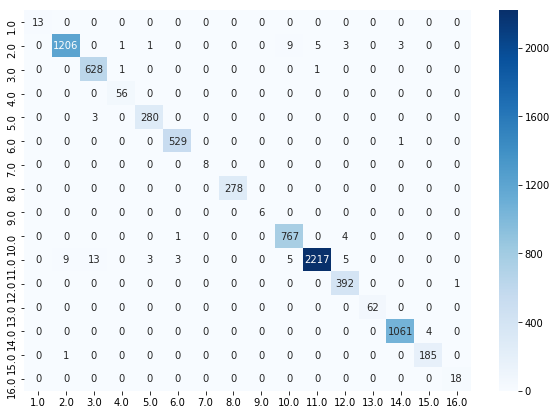

In [134]:
print_plot_cm(y_test, pred)

In [114]:
bands_data_dict = sio.loadmat(MAIN_FOLDER+DATA_PATH[0])
bands_data_1 = bands_data_dict[list(bands_data_dict.keys())[-1]]
bands_data_1 = norma_data(bands_data_1)

In [79]:
print(MAIN_FOLDER+DATA_PATH[0])

E:/HSI/IP/Indian_pines_corrected


In [107]:
pre = bands_data_1.reshape((bands_data_1.shape[0]*bands_data_1.shape[1], bands_data_1.shape[2], -1))

In [108]:
print(pre.shape)

(21025, 200, 1)


In [109]:
f1 = cnn_1d_feature([pre])[0]

In [110]:
print(f1.shape)

(21025, 864)


In [111]:
print(bands_data_1.shape)

(145, 145, 200)


In [115]:
n = int((m - 1) / 2)
bands_data_1 = np.pad(bands_data_1, ((n, n), (n, n), (0, 0)), 'constant', constant_values=0)
cols = bands_data_1.shape[1]-2*n
rows = bands_data_1.shape[0]-2*n
result1 = []
f2 = []
for g in range(0, rows, 1):
    for h in range(0, cols, 1):
        data = bands_data_1[g: g + m, h: h + m, :]
        result1.append(data)
        if len(result1) == 3200 or g == int(rows-1):
            print("Batches Features...")
            pre1 = np.stack(result1)
            fe = cnn_2d_feature([pre1])[0]
            f2.append(fe)
            result1 = []
f2 = np.concatenate(f2)

Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...
Batches Features...


In [116]:
print(f2.shape)

(21025, 432)


In [117]:
f3 = np.concatenate([f1, f2], axis=1)

In [136]:
p = model1.predict(f3)

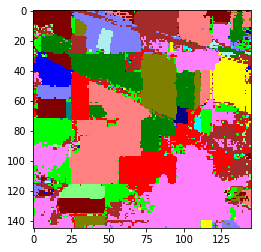

Confidence < 0.5:  0.15386444708680141


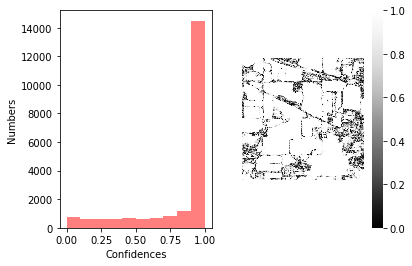

In [178]:
write_whole_image_classification_result(p, shape=(145, 145))

write_whole_image_predicts_prob(p, shape=(145, 145))

In [ ]:
pf = open(log, 'w')
pf.write("")